In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [11]:
# initialisation avec liste des dimensions des couches
def initialisation(dimensions):

    parameters = {}

    for c in range(1, len(dimensions)):
        parameters["W" + str(c)] = np.random.randn(dimensions[c], dimensions[c-1])
        parameters["b" + str(c)] = np.zeros((dimensions[c], 1))

    return parameters

params = initialisation([2, 4, 4, 1])

for k, v in params.items():
    print(k, v.shape)

W1 (4, 2)
b1 (4, 1)
W2 (4, 4)
b2 (4, 1)
W3 (1, 4)
b3 (1, 1)


In [15]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('Dimensions de x', X.shape)
print('Dimensions de y', y.shape)

def forward_propagation(X, parameters):

    activations = {"A0": X}

    C = len(parameters) // 2  

    for c in range(1, C + 1):
        Z = parameters["W" + str(c)].dot(activations["A" + str(c-1)]) + parameters["b" + str(c)]
        activations["A" + str(c)] = 1 / (1 + np.exp(-Z))

    return activations

activations = forward_propagation(X, params)

for k, v in activations.items():
    print(k, v.shape)

Dimensions de x (2, 100)
Dimensions de y (1, 100)
A0 (2, 100)
A1 (4, 100)
A2 (4, 100)
A3 (1, 100)


In [5]:
def log_loss(A, y):
    epsilon = 1e-15
    m = y.shape[1]
    return -1 / m * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))


In [16]:
def back_propagation(y, activations, parameters):

    m = y.shape[1]
    C = len(parameters) // 2

    dZ = activations["A" + str(C)] - y
    gradients = {}

    for c in reversed(range(1, C + 1)):
        gradients["dW" + str(c)] = 1 / m * dZ.dot(activations["A" + str(c-1)].T)
        gradients["db" + str(c)] = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = parameters["W" + str(c)].T.dot(dZ) * activations["A" + str(c-1)] * (1 - activations["A" + str(c-1)])

    return gradients

gradients = back_propagation(y, activations, params)

for k, v in gradients.items():
    print(k, v.shape)

3
W shape (1, 4)
dZ shape (1, 100)
2
W shape (4, 4)
dZ shape (4, 100)
dW3 (1, 4)
db3 (1, 1)
dW2 (4, 4)
db2 (4, 1)
dW1 (4, 2)
db1 (4, 1)


In [30]:
def update(gradients, parameters, learning_rate):

    C = len(parameters) // 2

    for c in range(1, C):
        parameters["W" + str(c)] -= learning_rate * gradients["dW" + str(c)]
        parameters["b" + str(c)] -= learning_rate * gradients["db" + str(c)]    

    return parameters

In [22]:
def predict(X, parameters):
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    return A2 >= 0.5

In [28]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def neural_network(X_train, y_train, hidden_layers = (32, 32, 32), learning_rate = 0.1, n_iter = 100):

    dimensions = [X_train.shape[0]] + list(hidden_layers) + [y_train.shape[0]]

    parameters = initialisation(dimensions)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        
        activations = forward_propagation(X_train, parameters)
        gradients = back_propagation(y_train, activations, parameters)
        parameters = update(gradients, parameters, learning_rate)
        
        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(activations['A2'], y_train))

            y_pred = predict(X_train, parameters)
            current_acc = accuracy_score(y_train.flatten(), y_pred.flatten())

            train_acc.append(current_acc)
            # Test
            # A_test = model(X_test, W, b)
            # test_loss.append(log_loss(A_test, y_test))
            # test_acc.append(accuracy_score(y_test, predict(X_test, W, b)))

    #Visualisation des courbes d'apprentissage
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train loss')
    # plt.plot(test_loss, label='Test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train acc')
    # plt.plot(test_acc, label='Test acc')
    plt.legend()
    plt.show()

    y_pred = predict(X_train, parameters)
    print(accuracy_score(y_train, y_pred))

    return parameters

dimension de X : (2, 100)
dimension de y : (1, 100)


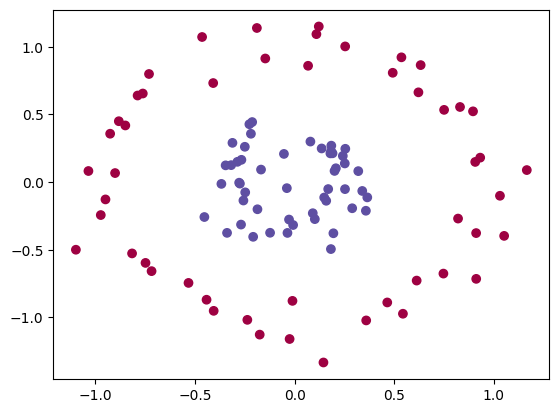

In [24]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)

X = X.T
y = y.reshape((1, y.shape[0]))

print('dimension de X :', X.shape)
print('dimension de y :', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
plt.show()

100%|██████████| 10000/10000 [00:01<00:00, 5652.80it/s]


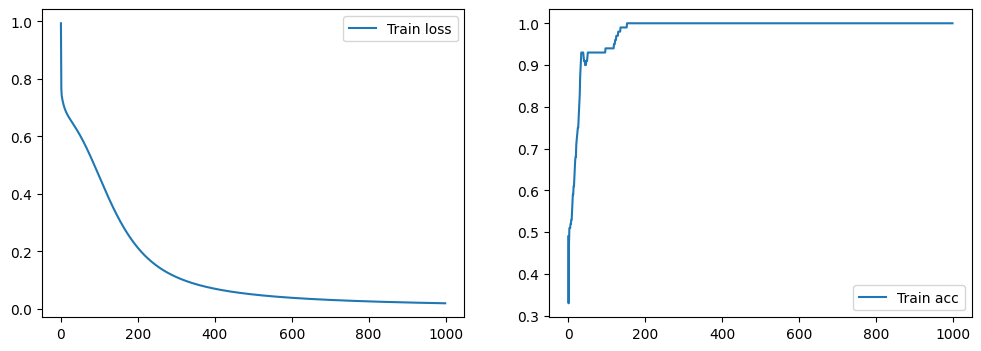

1.0


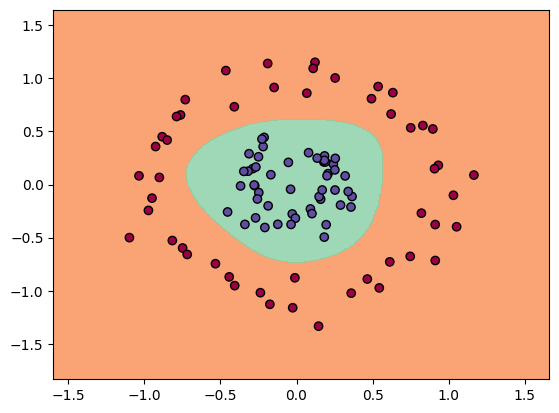

In [58]:
parameters = neural_network(X, y, n1=16, learning_rate=0.1, n_iter=10000)


x_min, x_max = X[0, :].min() - 0.5, X[0, :].max() + 0.5
y_min, y_max = X[1, :].min() - 0.5, X[1, :].max() + 0.5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = predict(np.c_[xx.ravel(), yy.ravel()].T, parameters)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral, edgecolors='k')



plt.show()
